# Predicting Hiring Decisions in Recruitment

Kaggle Dataset : https://www.kaggle.com/datasets/rabieelkharoua/predicting-hiring-decisions-in-recruitment-data/data

### Variables Description
**Age** <br>
Description: Age of the candidate.


**Gender** <br>
Description: Gender of the candidate.
Categories: Male (0) or Female (1).

**Education** Level <br>
Description: Highest level of education attained by the candidate.
Categories:
1: Bachelor's (Type 1)
2: Bachelor's (Type 2)
3: Master's
4: PhD
Data Type: Categorical.

**Experience Years** <br>
Description: Number of years of professional experience.
Data Range: 0 to 15 years.

**Previous Companies Worked** <br>
Description: Number of previous companies where the candidate has worked.
Data Range: 1 to 5 companies.

**Distance From Company** <br>
Description: Distance in kilometers from the candidate's residence to the hiring company.
Data Range: 1 to 50 kilometers.

**Interview Score** <br>
Description: Score achieved by the candidate in the interview process.
Data Range: 0 to 100.

**Skill**  <br>
Description: Assessment score of the candidate's technical skills.
Data Range: 0 to 100.

**Personality Score** <br>
Description: Evaluation score of the candidate's personality traits.
Data Range: 0 to 100.

**Recruitment Strategy** <br>
Description: Strategy adopted by the hiring team for recruitment.
Categories:
1: Aggressive
2: Moderate
3: Conservative


Hiring Decision (Target Variable) <br>
Description: Outcome of the hiring decision.
Categories:
0: Not hired
1: Hired




In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# upload data

df = pd.read_csv("../data/recruitment_data.csv")
df


,Age,Gender,EducationLevel,ExperienceYears,PreviousCompanies,DistanceFromCompany,InterviewScore,SkillScore,PersonalityScore,RecruitmentStrategy,HiringDecision
0,26,1,2,0,3,26.783828,48,78,91,1,1
1,39,1,4,12,3,25.862694,35,68,80,2,1
2,48,0,2,3,2,9.920805,20,67,13,2,0
3,34,1,2,5,2,6.407751,36,27,70,3,0
4,30,0,1,6,1,43.105343,23,52,85,2,0
...,...,...,...,...,...,...,...,...,...,...,...
1495,48,0,2,3,4,9.183783,66,3,80,3,1
1496,27,1,2,10,3,14.847731,43,97,7,2,0
1497,24,1,1,1,2,4.289911,31,91,58,1,1
1498,48,0,2,4,4,36.299263,9,37,44,2,1


## Data Analysis & Visualization

Let's do some preliminary data analysis and visualization.

### Checking for NaNs and Duplicates

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  1500 non-null   int64  
 1   Gender               1500 non-null   int64  
 2   EducationLevel       1500 non-null   int64  
 3   ExperienceYears      1500 non-null   int64  
 4   PreviousCompanies    1500 non-null   int64  
 5   DistanceFromCompany  1500 non-null   float64
 6   InterviewScore       1500 non-null   int64  
 7   SkillScore           1500 non-null   int64  
 8   PersonalityScore     1500 non-null   int64  
 9   RecruitmentStrategy  1500 non-null   int64  
 10  HiringDecision       1500 non-null   int64  
dtypes: float64(1), int64(10)
memory usage: 129.0 KB


In [6]:
# Check nan values in each column
df.isna().sum()


Age                    0
Gender                 0
EducationLevel         0
ExperienceYears        0
PreviousCompanies      0
DistanceFromCompany    0
InterviewScore         0
SkillScore             0
PersonalityScore       0
RecruitmentStrategy    0
HiringDecision         0
dtype: int64

In [7]:
df.duplicated().sum()

0

Text(0.5, 1.0, 'Interview score')

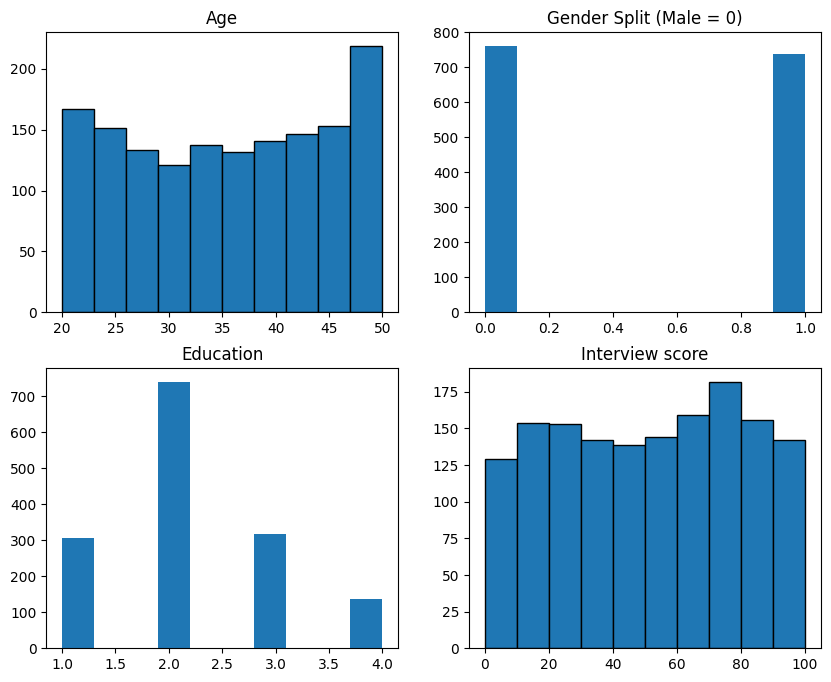

In [8]:
# age of the candidates

# Create a figure
fig = plt.figure(figsize=(10, 8))


# First subplot
plt.subplot(2, 2, 1)
plt.hist(df['Age'],edgecolor = 'black')
plt.title("Age")

# Second subplot
plt.subplot(2, 2, 2)
plt.hist(df.Gender)
plt.title("Gender Split (Male = 0)")


# third subplot
plt.subplot(2, 2, 3)
plt.hist(df.EducationLevel)
plt.title("Education")

# fourth subplot
plt.subplot(2, 2, 4)
plt.hist(df['InterviewScore'],edgecolor = 'black')
plt.title("Interview score")




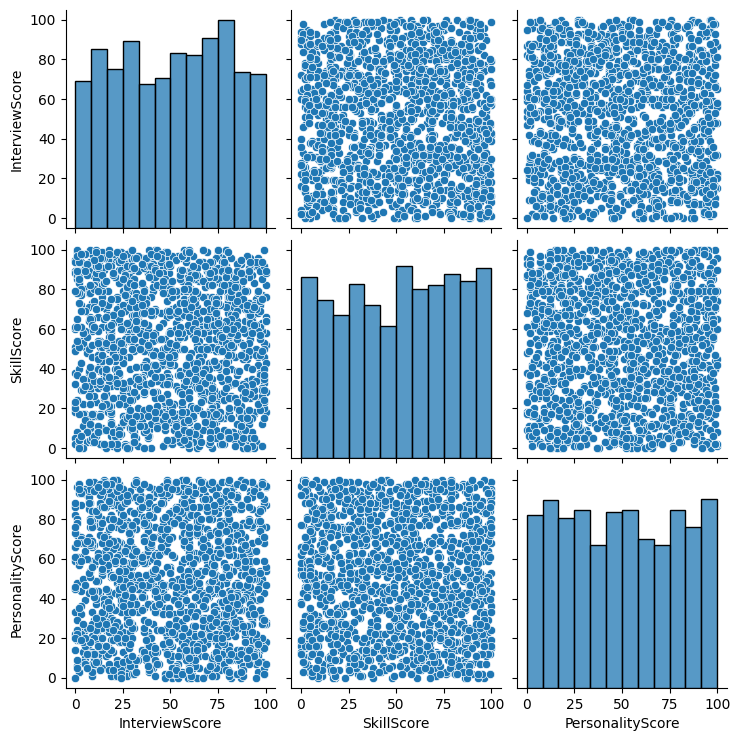

In [79]:
# pairplot between scores

sns.pairplot(df[["InterviewScore", "SkillScore", "PersonalityScore"]])
# to show
plt.show()

<Axes: xlabel='ExperienceYears', ylabel='count'>

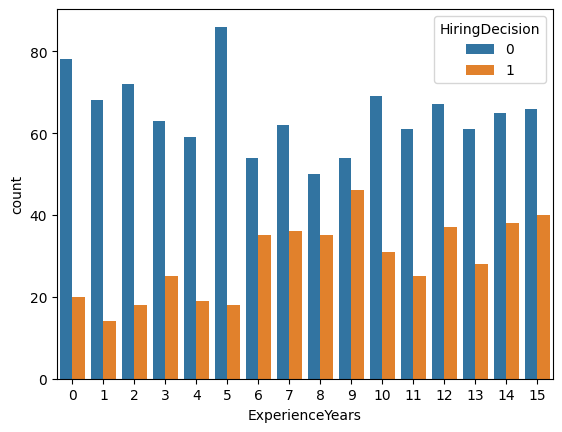

In [80]:
sns.countplot(data=df, x="ExperienceYears", hue="HiringDecision")

Text(0.5, 1.0, 'Box Plot of Distance from company')

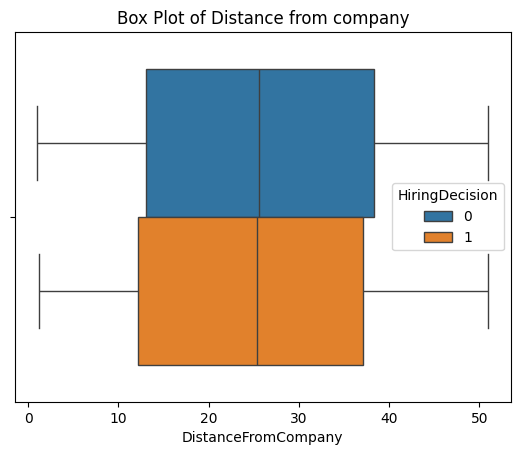

In [81]:
sns.boxplot(data= df, x="DistanceFromCompany", hue="HiringDecision")
plt.title('Box Plot of Distance from company')

<Axes: >

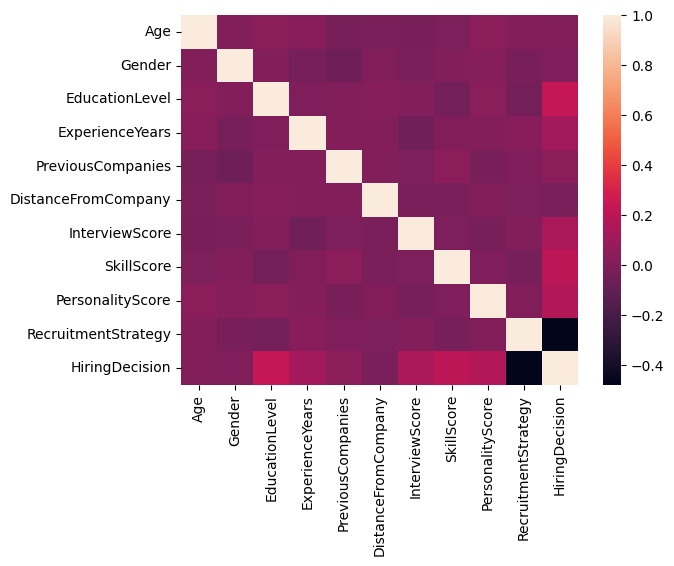

In [83]:
sns.heatmap(df.corr())

<Axes: xlabel='HiringDecision', ylabel='count'>

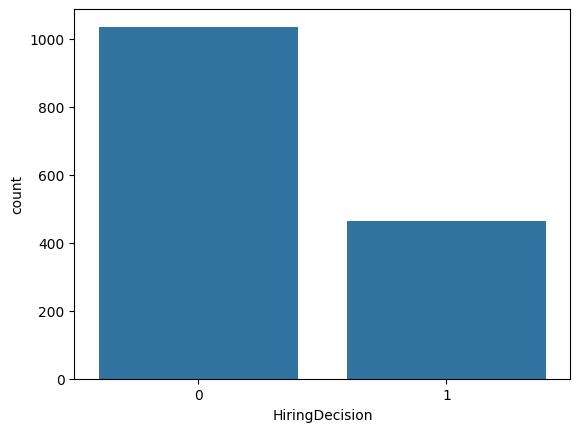

In [141]:
# checking if dataset is balanced 
sns.countplot(data=df, x='HiringDecision')

## Feature Engineering

### Binning and categorization

In [9]:
# Age feature - 3 bins

bins = [20, 30, 40, 51]  # Define the bin edges
labels = ['20-30', '30-40', '40-50']  # Define the labels for the bins
df['Age_Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)
df

,Age,Gender,EducationLevel,ExperienceYears,PreviousCompanies,DistanceFromCompany,InterviewScore,SkillScore,PersonalityScore,RecruitmentStrategy,HiringDecision,Age_Group
0,26,1,2,0,3,26.783828,48,78,91,1,1,20-30
1,39,1,4,12,3,25.862694,35,68,80,2,1,30-40
2,48,0,2,3,2,9.920805,20,67,13,2,0,40-50
3,34,1,2,5,2,6.407751,36,27,70,3,0,30-40
4,30,0,1,6,1,43.105343,23,52,85,2,0,30-40
...,...,...,...,...,...,...,...,...,...,...,...,...
1495,48,0,2,3,4,9.183783,66,3,80,3,1,40-50
1496,27,1,2,10,3,14.847731,43,97,7,2,0,20-30
1497,24,1,1,1,2,4.289911,31,91,58,1,1,20-30
1498,48,0,2,4,4,36.299263,9,37,44,2,1,40-50


In [10]:
# Experience years - 3 bins

bins = [0, 6, 11, 16]  # Define the bin edges
labels = ['0-5', '5-10', '10-15']  # Define the labels for the bins
df['Experience'] = pd.cut(df['ExperienceYears'], bins=bins, labels=labels, right=False)
df

,Age,Gender,EducationLevel,ExperienceYears,PreviousCompanies,DistanceFromCompany,InterviewScore,SkillScore,PersonalityScore,RecruitmentStrategy,HiringDecision,Age_Group,Experience
0,26,1,2,0,3,26.783828,48,78,91,1,1,20-30,0-5
1,39,1,4,12,3,25.862694,35,68,80,2,1,30-40,10-15
2,48,0,2,3,2,9.920805,20,67,13,2,0,40-50,0-5
3,34,1,2,5,2,6.407751,36,27,70,3,0,30-40,0-5
4,30,0,1,6,1,43.105343,23,52,85,2,0,30-40,5-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,48,0,2,3,4,9.183783,66,3,80,3,1,40-50,0-5
1496,27,1,2,10,3,14.847731,43,97,7,2,0,20-30,5-10
1497,24,1,1,1,2,4.289911,31,91,58,1,1,20-30,0-5
1498,48,0,2,4,4,36.299263,9,37,44,2,1,40-50,0-5


### Scaling and normalization

In [11]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

X_num = df[["PreviousCompanies","DistanceFromCompany", "InterviewScore", "SkillScore", "PersonalityScore"]]
X_cat = df[["Age_Group", "Experience", "EducationLevel", "Gender"]].astype(str)
X = pd.concat([X_num, X_cat], axis=1)

numeric_feature = X.select_dtypes(exclude="object").columns
cat_features = X.select_dtypes(include="object").columns

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("StandardScaler", numeric_transformer, numeric_feature),
        ("OneHotEncoder", oh_transformer, cat_features)
    ]
)


In [12]:
# defining X and y
X = preprocessor.fit_transform(X)
y = df["HiringDecision"]

### train-test split

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape

((1200, 17), (300, 17))

## Model Selection & Training

### XGBoost

In [29]:
from xgboost import XGBClassifier
from sklearn.metrics import recall_score, precision_score, f1_score, confusion_matrix, accuracy_score, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV

model = XGBClassifier(objective="binary:logistic")
parameters = {
     "eta"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ],
     "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
     "min_child_weight" : [ 1, 3, 5, 7 ],
     "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
     "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ],
     "n_estimators"     : [10, 20, 30]
     }

grid = GridSearchCV(model, parameters, n_jobs=4, cv=3)

In [30]:
# training step

grid.fit(X_train, y_train)


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             n_jobs=4,
             param_grid={'colsample_bytree': [0.3, 0.4, 0.5, 0.7],
                         'eta': [0.05, 0.1, 0.15, 0.2, 0.25, 0.3],
                         'gamma': [0.0, 0.1, 0.2, 0.3, 0.4],
                         'max_depth': [3, 4, 5, 6, 8, 10, 12, 15],
                         'min_child_weight': [1, 3, 5, 7],
                         'n_estimators': [10, 20, 30]})

In [31]:
grid.best_params_

{'colsample_bytree': 0.4,
 'eta': 0.15,
 'gamma': 0.0,
 'max_depth': 3,
 'min_child_weight': 7,
 'n_estimators': 30}

In [32]:
# testing
y_predict = grid.predict(X_test)

In [34]:
print("Precision = {}".format(precision_score(y_test, y_predict, average='macro')))
print("Recall = {}".format(recall_score(y_test, y_predict, average='macro')))
print("Accuracy = {}".format(accuracy_score(y_test, y_predict)))

Precision = 0.7228682170542635
Recall = 0.6321477428180574
Accuracy = 0.7633333333333333


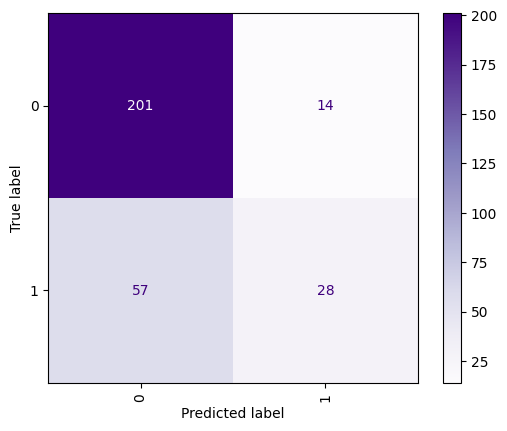

In [36]:
ConfusionMatrixDisplay.from_predictions(y_test, y_predict, cmap = plt.cm.Purples, normalize = None, display_labels = ['0', '1'], xticks_rotation="vertical")

The results are pretty poor. The data is also very unbalanced, with most of the training targets being 'rejections'. The model seems to also become biased as well, as seen in the confusion matrix scores. Let's see if we can improvde the results by using other models

## Improving the prediction scores

Let's explore the other models

In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [46]:
models = {
    'Linear Regression': LogisticRegression(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'XGBoost': XGBClassifier(random_state=42)
}

# Training the model
for name, model in models.items():
    model.fit(X_train, y_train)
    print(f"{name} trained.")

print("--------------------------------------------------------------------")

# Evaluate the models
model_scores = {}
for name, model in models.items():
    y_pred = model.predict(X_test)
    f1 = f1_score(y_test, y_pred)
    recall = recall_score(y_test, y_predict)
    model_scores[name] = {
        "f1_score": f1,
        "recall": recall
        }
    print(f"{name} f1: {f1:.2f}, recall:{recall:.2f}")

Linear Regression trained.
Random Forest trained.
Decision Tree trained.
Gradient Boosting trained.
XGBoost trained.
--------------------------------------------------------------------
Linear Regression f1: 0.45, recall:0.33
Random Forest f1: 0.43, recall:0.33
Decision Tree f1: 0.40, recall:0.33
Gradient Boosting f1: 0.48, recall:0.33
XGBoost f1: 0.41, recall:0.33


Other models are also showing poor evaluations scores too. There might be a problem with the EDA of the data, let's use a different strategy. 

### Let's modify the data slightly

In [78]:
df = pd.read_csv("../data/recruitment_data.csv")

# Split data into Features and Target
X = df.drop(['HiringDecision'], axis=1)
y = df['HiringDecision']

numeric_transformer = StandardScaler()
scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [79]:
models = {
    'Linear Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'XGBoost': XGBClassifier(random_state=42)
}

# Training the model
for name, model in models.items():
    model.fit(X_train, y_train)
    print(f"{name} trained.")

print("--------------------------------------------------------------------")

# Evaluate the models
model_scores = {}
for name, model in models.items():
    y_pred = model.predict(X_test)
    f1 = f1_score(y_test, y_pred)
    recall = recall_score(y_test, y_predict)
    model_scores[name] = {
        "f1_score": f1,
        "recall": recall
        }
    print(f"{name} f1: {f1:.2f}, recall:{recall:.2f}")

Linear Regression trained.
Random Forest trained.
Decision Tree trained.
Gradient Boosting trained.
XGBoost trained.
--------------------------------------------------------------------
Linear Regression f1: 0.76, recall:0.88
Random Forest f1: 0.88, recall:0.88
Decision Tree f1: 0.81, recall:0.88
Gradient Boosting f1: 0.88, recall:0.88
XGBoost f1: 0.89, recall:0.88


The results are much better now. Instead of binning and one-hot encoding categorical variables such as gender and age, what I have done is to just scale the features. This shows that the relationships between the features are better understood by the model if one-hot encoding is not applied in this particular case.

Let's pick XGBoost and run a gridsearch to find the best perfomring hyperparams.

In [80]:
# hyperparam tuning 
model = XGBClassifier(objective="binary:logistic")
parameters = {
     "eta"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ],
     "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
     "min_child_weight" : [ 1, 3, 5, 7 ],
     "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
     "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ],
     "n_estimators"     : [10, 20, 30]
     }

grid = GridSearchCV(model, parameters, n_jobs=4, cv=3)
grid.fit(X_train, y_train)
grid.best_params_

{'colsample_bytree': 0.7,
 'eta': 0.25,
 'gamma': 0.4,
 'max_depth': 3,
 'min_child_weight': 7,
 'n_estimators': 30}

Precision = 0.9460227272727273
Recall = 0.9295485636114911
Accuracy = 0.95


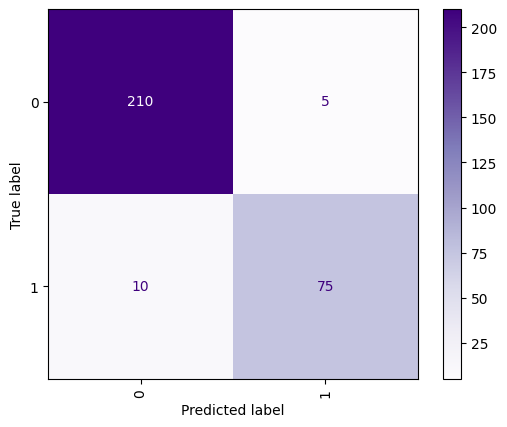

In [81]:
# testing
y_predict = grid.predict(X_test)
print("Precision = {}".format(precision_score(y_test, y_predict, average='macro')))
print("Recall = {}".format(recall_score(y_test, y_predict, average='macro')))
print("Accuracy = {}".format(accuracy_score(y_test, y_predict)))
ConfusionMatrixDisplay.from_predictions(y_test, y_predict, cmap = plt.cm.Purples, normalize = None, display_labels = ['0', '1'], xticks_rotation="vertical")

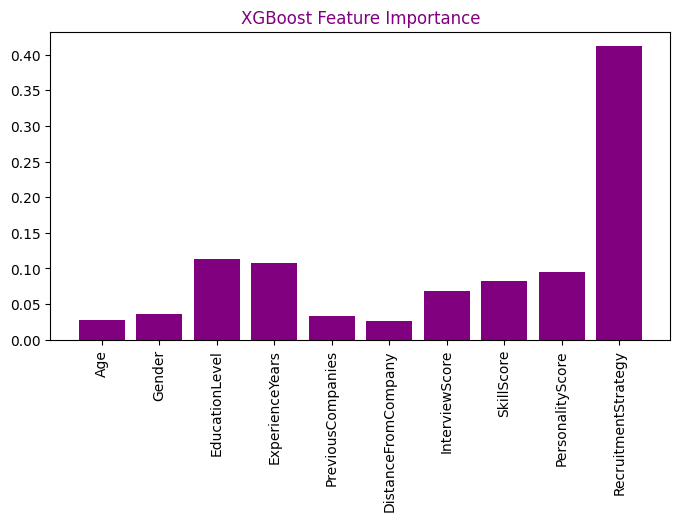

In [85]:
feature_importances = grid.best_estimator_.feature_importances_
plt.figure(figsize=(8, 4))
plt.bar(range(len(feature_importances)), feature_importances, color = 'purple')
plt.xticks(range(len(feature_importances)), df.drop(['HiringDecision'], axis=1).columns, rotation=90)
plt.title(f"{name} Feature Importance", color = 'purple')
plt.show()

We have improved XGBoost substantially by finding the perfect combination of hyperparams. False negatives are still quite high as for the unbalanced dataset. However the accuracy is now 95%

## Saving the model

In [86]:
from joblib import dump, load

dump(grid.best_estimator_, "model.joblib")
dump(scaler, "scaler.joblib")

['scaler.joblib']

## Testing the model

In [120]:
load_model = load("model.joblib")

data  = {
    'Age': 26,
    'Gender': 0,
    'EducationLevel': 3,
    'ExperienceYears': 3,
    'PreviousCompanies': 2,
    'DistanceFromCompany': 48,
    'InterviewScore': 80,
    'SkillScore': 72,
    'PersonalityScore': 90,
    'RecruitmentStrategy': 3
}

test_input = pd.DataFrame([data])
load_scaler = load('scaler.joblib')

test_input_features = load_scaler.transform(test_input)
final_pred = load_model.predict(test_input_features)
final_pred[0]

1